# Course 2 Project: ML Pipeline for Feature Engineering

## Instructions

In this project, you'll use data related to microeconomic indicators and historical stock prices to explore the data engineering pipline. You'll get to practice:

* Data ingestion 
* Data cleaning
* Data imputation
* Exploratory data analysis (EDA) through charts and graphs

## Packages

You'll use `pandas` and `matplotlib`, which were covered in the course material, to import, clean, and plot data. They have been installed in this workspace for you. If you're working locally and you installed Jupyter using Anaconda, these packages will already be installed. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

### Your tasks
* Import data from the provided [GitHub repo](https://github.com/udacity/CD13649-Project/tree/main/Project) using `pandas`. For your convenience, the data files (CSVs) are also present in the current workspace at the path **CD13649-Project/Project/**. Here are the data files to import: 
  1. GDP (**GDP.csv**)
  2. Inflation (**inflation_monthly.csv**)
  3. Apple stock prices (**apple_historical_data.csv**)
  4. Microsoft stock prices (**microsoft_historical_data.csv**)
  5. Consumer price index (**consumer_price_index.csv**)



* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`


* You may need to change column names to make them easier to work with


* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method



In [2]:
# Load historical GDP data
gdp = pd.read_csv('https://raw.githubusercontent.com/udacity/CD13649-Project/refs/heads/main/Project/GDP.csv')

inflation = pd.read_csv('https://raw.githubusercontent.com/udacity/CD13649-Project/refs/heads/main/Project/inflation_monthly.csv')


In [3]:
# Check the first few rows of data
gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [4]:
# Inspect inflation data info
inflation.head()

,DATE,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245


In [5]:
# fix the column names
inflation.columns = ['Date', 'Inflation']

# Convert the 'Date' column to a datetime format
inflation['Date'] = pd.to_datetime(inflation['Date'])
inflation.head()

,Date,Inflation
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245


In [6]:
# Load the historical stock price data for Apple and Microsoft

APPL = pd.read_csv('https://raw.githubusercontent.com/udacity/CD13649-Project/refs/heads/main/Project/apple_historical_data.csv')
MSFT = pd.read_csv('https://raw.githubusercontent.com/udacity/CD13649-Project/refs/heads/main/Project/microsoft_historical_data.csv')

In [7]:
# Check the first few rows of data
# Inspect Apple Stock data
APPL.head()


,Date,Close/Last,Volume,Open,High,Low
0,5/3/2024,$183.38,163224100,$186.65,$187.00,$182.66
1,5/2/2024,$173.03,94214920,$172.51,$173.42,$170.89
2,5/1/2024,$169.30,50383150,$169.58,$172.71,$169.11
3,4/30/2024,$170.33,65934780,$173.33,$174.99,$170.00
4,4/29/2024,$173.50,68169420,$173.37,$176.03,$173.10


In [8]:
# Inspect Apple Stock data
MSFT.head()


,Date,Close/Last,Volume,Open,High,Low
0,05/03/2024,$406.66,17446720,$402.28,$407.15,$401.86
1,05/02/2024,$397.84,17709360,$397.66,$399.93,$394.6515
2,05/01/2024,$394.94,23562480,$392.61,$401.7199,$390.31
3,04/30/2024,$389.33,28781370,$401.49,$402.16,$389.17
4,04/29/2024,$402.25,19582090,$405.25,$406.32,$399.19


In [9]:
# Use methods like .info() and .describe() to explore the data
MSFT.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2517 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [10]:
MSFT.describe()

,Volume
count,2.517000e+03
mean,2.953106e+07
std,1.370138e+07
min,7.425603e+06
25%,2.131892e+07
50%,2.639470e+07
75%,3.360003e+07
max,2.025141e+08


## Data preprocessing: Check for missing data and forward fill

Check the Apple historical prices for missing data. Check for missing data in all columns. If there's data missing, use a forward fill to fill in those missing prices. 

In [11]:
# Check for nulls 
APPL.isnull().sum()


Date          0
Close/Last    3
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [12]:
# Forward fill any missing data
def fill_missing_data(df):
    if df.isnull().sum().any():
        df.ffill(inplace=True)
        
    return df
APPL = fill_missing_data(APPL)

In [13]:
# Check again for nulls after using forward fill
APPL.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

## Data preprocessing: Remove special characters and convert to numeric/datetime

The next step in the data engineering process is to standardize and clean up data. In this step, you'll check for odd formatting and special characters that will make it difficult to work with data as numeric or datetime. 

In this step:
* Create a function that takes in a dataframe and a list of columns and removes dollar signs ('$') from those columns
* Convert any columns with date/time data into a `pandas` `datetime` format

In [14]:
# Fix stock prices columns names for standardization
def fix_stock_price_columns_names(df):
    df.columns = ['Date', 'Close', 'Volumne', 'Open', 'High', 'Low']
    return df
APPL = fix_stock_price_columns_names(APPL)
APPL.head()

,Date,Close,Volumne,Open,High,Low
0,5/3/2024,$183.38,163224100,$186.65,$187.00,$182.66
1,5/2/2024,$173.03,94214920,$172.51,$173.42,$170.89
2,5/1/2024,$169.30,50383150,$169.58,$172.71,$169.11
3,4/30/2024,$170.33,65934780,$173.33,$174.99,$170.00
4,4/29/2024,$173.50,68169420,$173.37,$176.03,$173.10


In [15]:
def convert_dollar_columns_to_numeric(df, numeric_columns=['Close', 'Open', 'High', 'Low']):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''
    for col in numeric_columns:
        df[col] = df[col].replace(r'\$', '',regex=True).astype(float)
    return df


In [16]:
# Use convert_dollar_columns_to_numeric() to remove the dollar sign from the Apple and Microsoft datasets
APPL = convert_dollar_columns_to_numeric(APPL)
APPL.head()



,Date,Close,Volumne,Open,High,Low
0,5/3/2024,183.38,163224100,186.65,187.00,182.66
1,5/2/2024,173.03,94214920,172.51,173.42,170.89
2,5/1/2024,169.30,50383150,169.58,172.71,169.11
3,4/30/2024,170.33,65934780,173.33,174.99,170.00
4,4/29/2024,173.50,68169420,173.37,176.03,173.10


In [17]:
# Use pandas's to_datetime() to convert any columns that are in a datetime format
def convert_date_columns_to_datetime(df, date_columns=['Date']):
    # Convert the 'Date' column to a datetime format
  
    for col in date_columns:

        df[col] = pd.to_datetime(df[col]).sort_values(ascending=True)
    return df



In [18]:
APPL = convert_date_columns_to_datetime(APPL)
APPL.head()

,Date,Close,Volumne,Open,High,Low
0,2024-05-03,183.38,163224100,186.65,187.00,182.66
1,2024-05-02,173.03,94214920,172.51,173.42,170.89
2,2024-05-01,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-29,173.50,68169420,173.37,176.03,173.10


In [19]:
# Use .info() and check the type of each column to ensure that the above steps worked
APPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2517 non-null   datetime64[ns]
 1   Close    2517 non-null   float64       
 2   Volumne  2517 non-null   int64         
 3   Open     2517 non-null   float64       
 4   High     2517 non-null   float64       
 5   Low      2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [20]:
# Build pipeline for preprocessing data
def clean_dataframe(df):
    # fix the column names
    df = fix_stock_price_columns_names(df)
    # remove the dollar sign from the columns
    df = convert_dollar_columns_to_numeric(df)
    # convert the date column to a datetime format
    df = convert_date_columns_to_datetime(df)
    # forward fill any missing data
    df = fill_missing_data(df)
    # set the date column as the index
    df.set_index('Date',inplace=True)
    df.sort_index(inplace=True)

    return df

MSFT = clean_dataframe(MSFT)
MSFT.head()

,Close,Volumne,Open,High,Low
Date,,,,,
2014-05-06,39.060,27105700,39.29,39.35,38.95
2014-05-07,39.425,41731030,39.22,39.51,38.51
2014-05-08,39.640,32089010,39.34,39.90,38.97
2014-05-09,39.540,29646100,39.54,39.85,39.37
2014-05-12,39.970,22761620,39.74,40.02,39.65


In [21]:
# so does Apple stock data
APPL = clean_dataframe(APPL)
APPL.head()


,Close,Volumne,Open,High,Low
Date,,,,,
2014-05-06,21.23,373872650,21.49,21.59,21.23
2014-05-07,21.15,282128727,21.26,21.33,20.99
2014-05-08,21.00,228973884,21.01,21.23,20.94
2014-05-09,20.91,291068564,20.88,20.94,20.73
2014-05-12,21.17,212736019,20.98,21.20,20.98


## Data preprocessing: Align datetime data

Data engineering includes changing data with a datetime component if needed so that different time series can be more easily compared or plotted against each other. 

In this step:

* Align the inflation date so that it falls on the last day of the month instead of the first

Helpful hints: 
* Use the `pandas` `offsets` method using `MonthEnd(0)` to set the 'Date' column to month-end

In [22]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)
inflation['Date'] = inflation['Date'] + pd.offsets.MonthEnd(0)
inflation.head()


,Date,Inflation
0,1968-01-31,3.651861
1,1968-02-29,3.673819
2,1968-03-31,4.142164
3,1968-04-30,4.155828
4,1968-05-31,4.088245


## Data preprocessing: Upsample, downsample and interpolate data

Inflation data is presented monthly in this dataset. However, for some models, you may need it at a quarterly frequency, and for some models you may need it at a quarterly frequency. 

In this step:
* Create a new quarterly inflation dataframe by downsampling the monthly inflation data to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values from January, February, and March)
* Create a new weekly inflation dataframe by upsampling the monthly inflation data. For this, you'll need to use `resample` and then you'll need to `interpolate` to fill in the missing data at the weekly frequency

Note that you may need to change the index for some of these operations! 

In [23]:
inflation = convert_date_columns_to_datetime(inflation)
inflation.set_index('Date',inplace=True)
inflation.head()

,Inflation
Date,
1968-01-31,3.651861
1968-02-29,3.673819
1968-03-31,4.142164
1968-04-30,4.155828
1968-05-31,4.088245


In [24]:
# Upsample and interpolate from monthly to weekly 
def upsample_and_interpolate_monthly_to_weekly(df):

    df = df.resample('W',origin='start_day').mean().interpolate()
    return df

weekly_inflation = upsample_and_interpolate_monthly_to_weekly(inflation)
weekly_inflation.head()



,Inflation
Date,
1968-02-04,3.651861
1968-02-11,3.657351
1968-02-18,3.662840
1968-02-25,3.668330
1968-03-03,3.673819


In [25]:
# Downsample from monthly to quarterly 
def downsample_monthly_to_quarterly(df):
    df = df.resample('Q',origin='start_day').mean().interpolate()
    return df

quarterly_inflation = downsample_monthly_to_quarterly(inflation)
quarterly_inflation.head()


,Inflation
Date,
1968-03-31,3.822615
1968-06-30,4.263214
1968-09-30,4.882643
1968-12-31,5.429443
1969-03-31,5.873770


## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [26]:
gdp.columns = ['Date','GDP']
gdp = convert_date_columns_to_datetime(gdp,date_columns=['Date'])
gdp.set_index('Date',inplace=True)
gdp.head()


,GDP
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [27]:
# Standardize the GDP measure
from sklearn.discriminant_analysis import StandardScaler



scaler = StandardScaler()
gdp_scaled = scaler.fit_transform(gdp)
gdp_scaled = pd.DataFrame(gdp_scaled, columns=gdp.columns)


In [28]:
# Check the dataframe to make sure the calculation worked as expected 

gdp.head()

,GDP
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

In [29]:
# Get max date in timeseries
last_date = APPL.index.max()
last_date

Timestamp('2024-05-03 00:00:00')

In [30]:
# Use the max date calculated above to get the last three months of data in the dataset 

start_date = last_date - pd.offsets.MonthBegin(3)
start_date

Timestamp('2024-03-01 00:00:00')

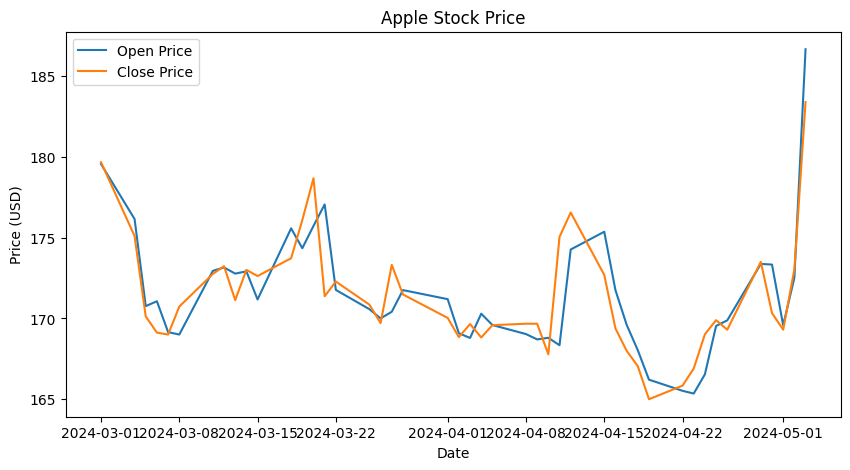

In [31]:
# Plot time series of open v. close stock price for Apple using the last 3 months of data
fig, ax = plt.subplots(figsize=(10, 5))
last_3_months_APPL = APPL.loc[start_date:last_date]
ax.plot(last_3_months_APPL.index,last_3_months_APPL['Open'], label='Open Price')
ax.plot(last_3_months_APPL.index,last_3_months_APPL['Close'], label='Close Price')
ax.legend()
ax.set_title('Apple Stock Price')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
plt.show()




## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

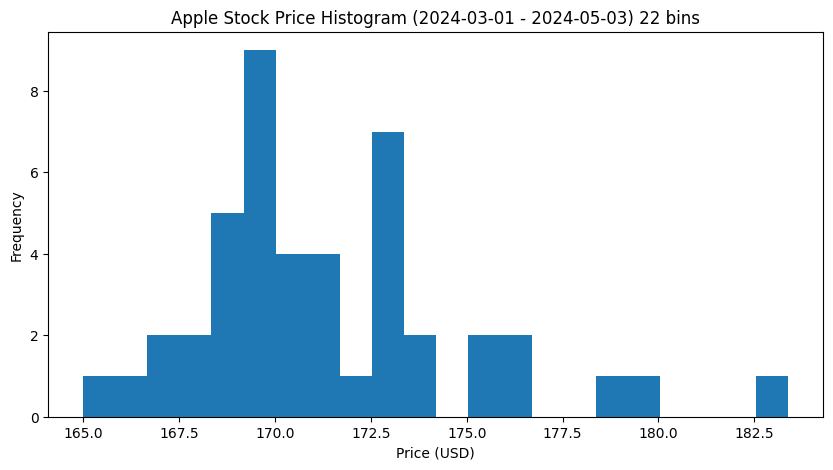

In [32]:
# Plot the histogram of Apple's closing price over the last 3 months 
fig, ax = plt.subplots(figsize=(10, 5))
# dynamically select the number of bins based on the range of the data
num_bins = int(len(APPL.loc[start_date:last_date]['Close']) / 2)
ax.hist(APPL.loc[start_date:last_date]['Close'], bins=num_bins)
ax.set_title(f'Apple Stock Price Histogram ({start_date:%Y-%m-%d} - {last_date:%Y-%m-%d}) {num_bins} bins')
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Frequency')
plt.show()


## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

### 1. Calculate returns for Microsoft / Apple and the monthly change in inflation

In [33]:
# Calculate daily returns for Apple and Microsoft and the percent change in inflation from month to month
APPL_returns = APPL.pct_change()
MSFT_returns = MSFT.pct_change()
inflation_change = inflation.pct_change()


### 2. Interpolate stock returns from daily to monthly

In [34]:
APPL_returns_monthly = APPL_returns.resample('M').mean().interpolate()
MSFT_returns_monthly = MSFT_returns.resample('M').mean().interpolate()

In [35]:
# inspect the dataframe to make sure the interpolation worked as we neede
MSFT_returns_monthly.head()

,Close,Volumne,Open,High,Low
Date,,,,,
2014-05-31,0.002804,0.068496,0.001728,0.002398,0.001957
2014-06-30,0.000916,0.126222,0.002018,0.001451,0.001737
2014-07-31,0.001614,0.055076,0.001430,0.001652,0.001539
2014-08-31,0.002468,0.017951,0.001874,0.001890,0.001947
2014-09-30,0.001013,0.226594,0.001381,0.001102,0.001237


In [36]:
inflation.head()

,Inflation
Date,
1968-01-31,3.651861
1968-02-29,3.673819
1968-03-31,4.142164
1968-04-30,4.155828
1968-05-31,4.088245


In [37]:
# align the inflation date range with the stock returns, so that we have the aligned fluctuations
inflation_change_monthly = inflation_change.loc[inflation_change.index>=APPL_returns_monthly.index.min()]
inflation_change_monthly.head()

,Inflation
Date,
2014-05-31,0.050251
2014-06-30,0.007147
2014-07-31,-0.020724
2014-08-31,-0.066387
2014-09-30,-0.004516


### 3. Merge the dataframes and calculate / plot the correlation

In [38]:
merged_stock_monthly_returns = pd.concat([APPL_returns_monthly, MSFT_returns_monthly,inflation_change_monthly], axis=1,keys=['APPL','MSFT','Inflation'])


### 4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change

In [39]:
# Calculate correlation matrix
correlation_matrix = merged_stock_monthly_returns.corr()
correlation_matrix

APPL                                          \
                        Close   Volumne      Open      High       Low   
APPL      Close      1.000000  0.308206  0.978869  0.990494  0.987801   
          Volumne    0.308206  1.000000  0.279510  0.296148  0.253620   
          Open       0.978869  0.279510  1.000000  0.986879  0.991346   
          High       0.990494  0.296148  0.986879  1.000000  0.986912   
          Low        0.987801  0.253620  0.991346  0.986912  1.000000   
MSFT      Close      0.659815  0.258983  0.641928  0.639513  0.645039   
          Volumne   -0.344460  0.035433 -0.387574 -0.330111 -0.382960   
          Open       0.489649 -0.051290  0.509591  0.501927  0.503446   
          High       0.538213  0.051278  0.535677  0.545479  0.534906   
          Low        0.638039  0.160028  0.647074  0.630237  0.645152   
Inflation Inflation -0.082450 -0.090947 -0.098646 -0.082718 -0.100962   

                         MSFT                                          \
                        Close   Volumne      Open      High       Low   
APPL      Close      0.659815 -0.344460  0.489649  0.538213  0.638039   
          Volumne    0.258983  0.035433 -0.051290  0.051278  0.160028   
          Open       0.641928 -0.387574  0.509591  0.535677  0.647074   
          High       0.639513 -0.330111  0.501927  0.545479  0.630237   
          Low        0.645039 -0.382960  0.503446  0.534906  0.645152   
MSFT      Close      1.000000 -0.240082  0.869993  0.933783  0.973475   
          Volumne   -0.240082  1.000000 -0.097873 -0.105870 -0.242639   
          Open       0.869993 -0.097873  1.000000  0.967804  0.939137   
          High       0.933783 -0.105870  0.967804  1.000000  0.958404   
          Low        0.973475 -0.242639  0.939137  0.958404  1.000000   
Inflation Inflation -0.086133 -0.058391 -0.080064 -0.082768 -0.087124   

                    Inflation  
                    Inflation  
APPL      Close     -0.082450  
          Volumne   -0.090947  
          Open      -0.098646  
          High      -0.082718  
          Low       -0.100962  
MSFT      Close     -0.086133  
          Volumne   -0.058391  
          Open      -0.080064  
          High      -0.082768  
          Low       -0.087124  
Inflation Inflation  1.000000

### 5. Plot the correlation matrix as a heatmap 

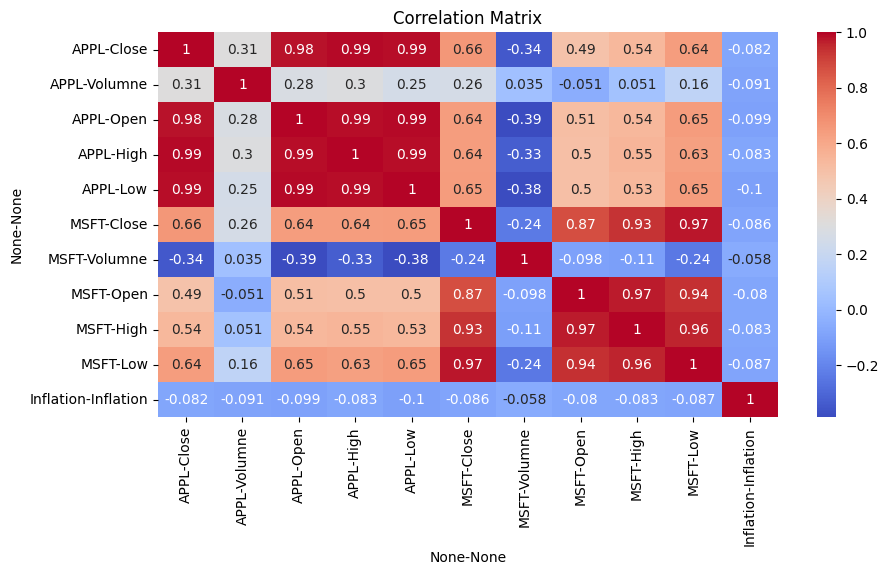

In [40]:
# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()


Hmm It seems, the Apple stock price and Microsoft stock price are postive correlated, and stocks are negative correlated with stock inflation, which make sense, as the buying power reducetion, people tends to invest for rolling their money to against the inflation

## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

In [41]:
# Define the window size for the rolling calculation (e.g., one week)
window_size = '7D'

In [42]:
# Calculate rolling one-week volatility
# Calculate the weekly rolling standard deviation for Apple's closing percentage price change (Log Returns)
rolling_weekly_volatility = last_3_months_APPL['Close'].pct_change().rolling(window='7D',min_periods=1,center=True).std() * 100

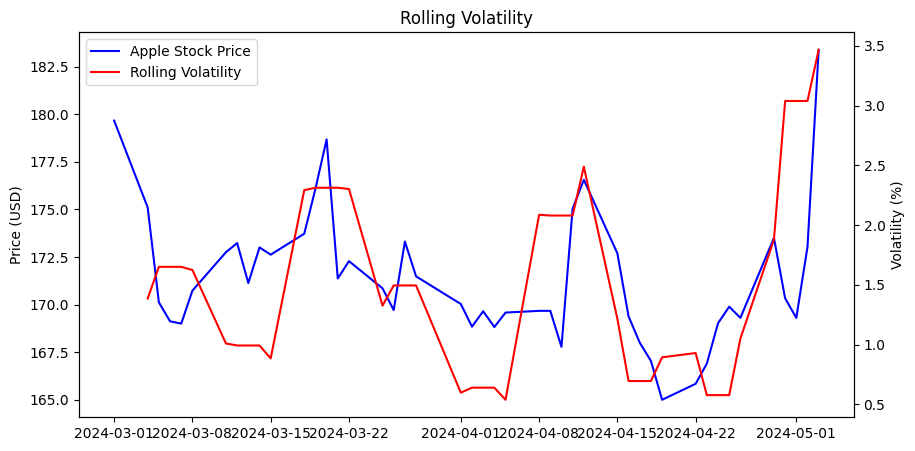

In [43]:
# Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price
# Plot these on the same chart, but using different y-axes
fig, ax1 = plt.subplots(figsize=(10, 5),sharex=True)

h1 =ax1.plot(last_3_months_APPL.index, last_3_months_APPL['Close'], label='Apple Stock Price', color='blue')
ax2 = ax1.twinx()
h2 = ax2.plot(last_3_months_APPL.index, rolling_weekly_volatility, label='Rolling Volatility', color='red')
ax1.set_title('Apple Stock Price vs Volatility')
ax1.set_title('Rolling Volatility')
ax1.set_ylabel('Price (USD)')
ax2.set_ylabel('Volatility (%)')
ax1.legend(handles=h1+h2)
plt.show()


## Export data

Now that you have preprocessed your data, you should save it in new csv files so that it can be used in downstream tasks without having to redo all the preprocessing steps. 

Your task:
* Use `pandas` to export all modified datasets back to new CSV files

In [44]:
MSFT.to_csv('MSFT.csv', index=True)
APPL.to_csv('APPL.csv', index=True)
inflation.to_csv('inflation.csv', index=True)
gdp.to_csv('gdp.csv', index=True)